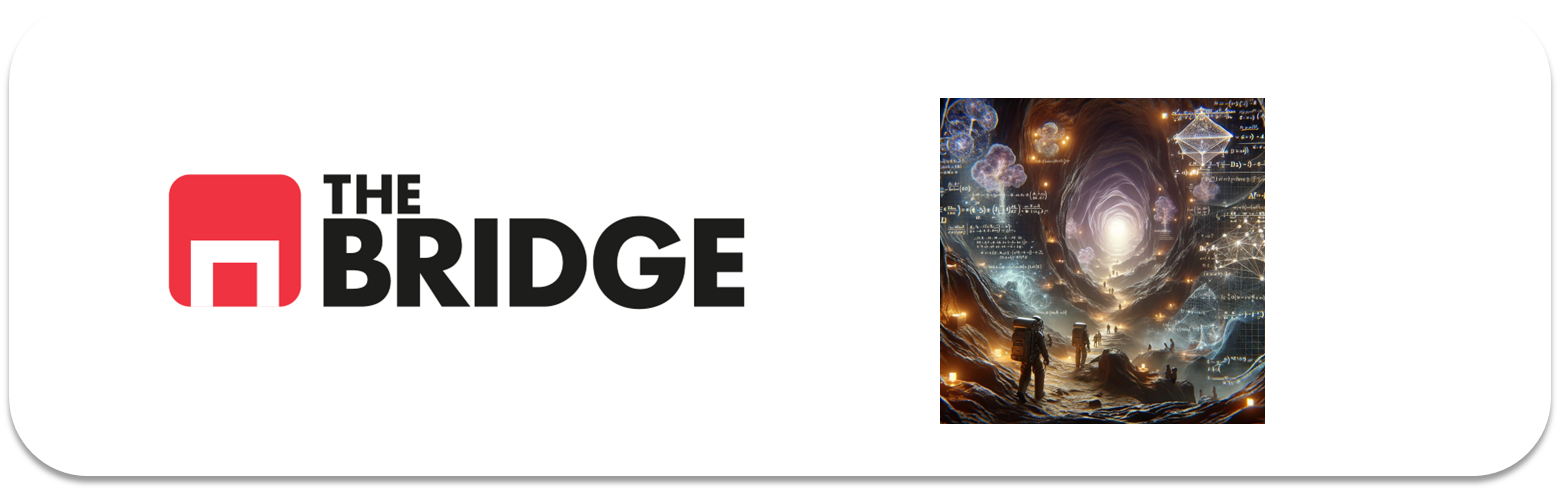

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [68]:
#Importamos las librerías necesarias
import bootcampviztools as viz

import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


# 1. Carga de datos y clasificación de variables


Comenzamos cargando el dataset y clasificamos las variables

In [69]:
df = pd.read_csv("./data/titanic.csv")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Eliminamos columnas del DataFrame que dan la misma información y eliminamos la columna deck por la alta cantidad de nulos que contiene

In [71]:
df.drop(columns=["class","embark_town", "alive", "deck"],inplace=True)

In [72]:
df.dropna(subset=["embarked"], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    object 
 3   age         712 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    bool   
 10  alone       889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 71.2+ KB


In [74]:
target = "survived"

In [76]:
df[target].value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

Obtenemos que el dataset está desbalanceado 

Realizamos la división del DataFrame en train y test 

In [77]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["embarked"], random_state=42)

In [78]:
train_set["embarked"].value_counts(normalize=True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [79]:
test_set["embarked"].value_counts(normalize=True)

embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64

Ahora vamos a imputar los valores nulos de `age`

In [80]:
#Calculamos las medias
media_age_man = train_set.loc[train_set["who"]=="man","age"].mean()
media_age_woman = train_set.loc[train_set["who"]=="woman","age"].mean()
media_age_child = train_set.loc[train_set["who"]=="child","age"].mean()

#Imputamos nulos en train
train_set.loc[(train_set["who"]=="man") & (train_set["age"].isna()),"age"] = media_age_man
train_set.loc[(train_set["who"]=="woman") & (train_set["age"].isna()),"age"] = media_age_woman
train_set.loc[(train_set["who"]=="child") & (train_set["age"].isna()),"age"] = media_age_child

#Imputamos nulos en test
test_set.loc[(test_set["who"]=="man") & (test_set["age"].isna()),"age"] = media_age_man
test_set.loc[(test_set["who"]=="woman") & (test_set["age"].isna()),"age"] = media_age_woman
test_set.loc[(test_set["who"]=="child") & (test_set["age"].isna()),"age"] = media_age_child

# 3. Mini eda

In [81]:
columnas_categoricas = ["pclass", "sex", "sibsp", "parch", "embarked", "who", "adult_male", "alone"]

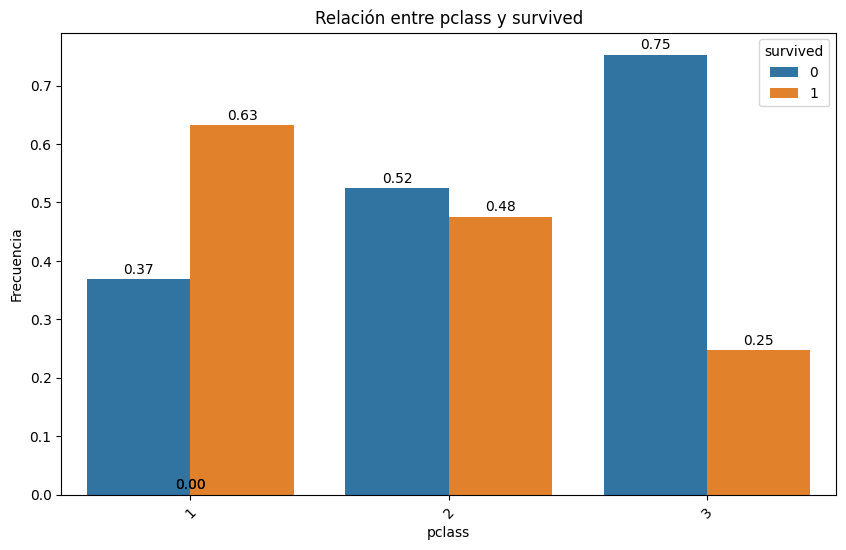

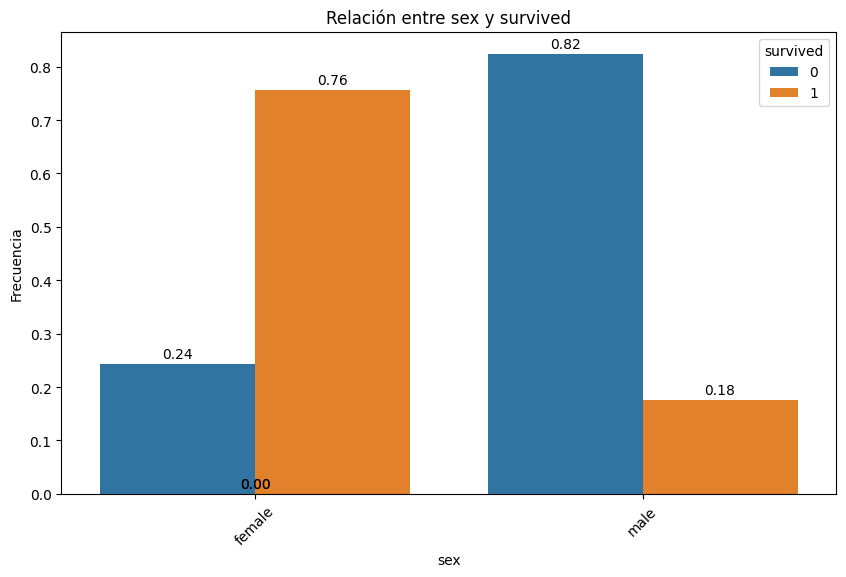

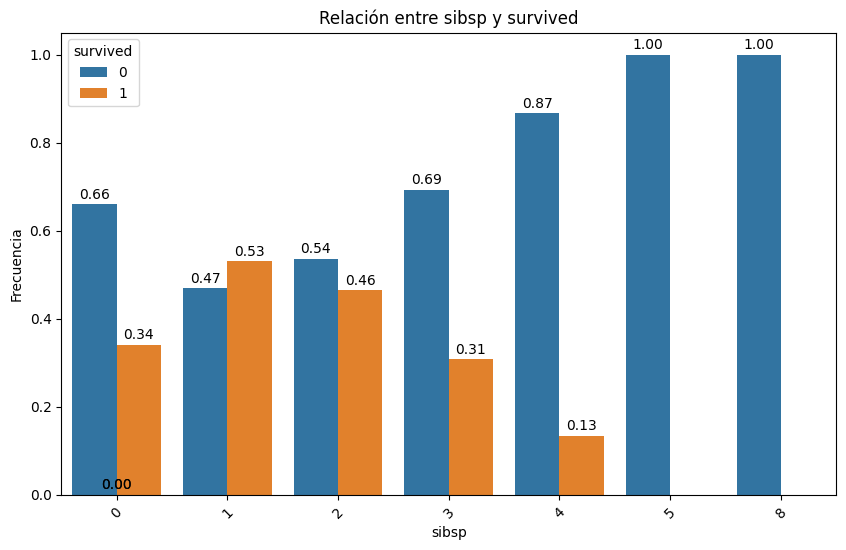

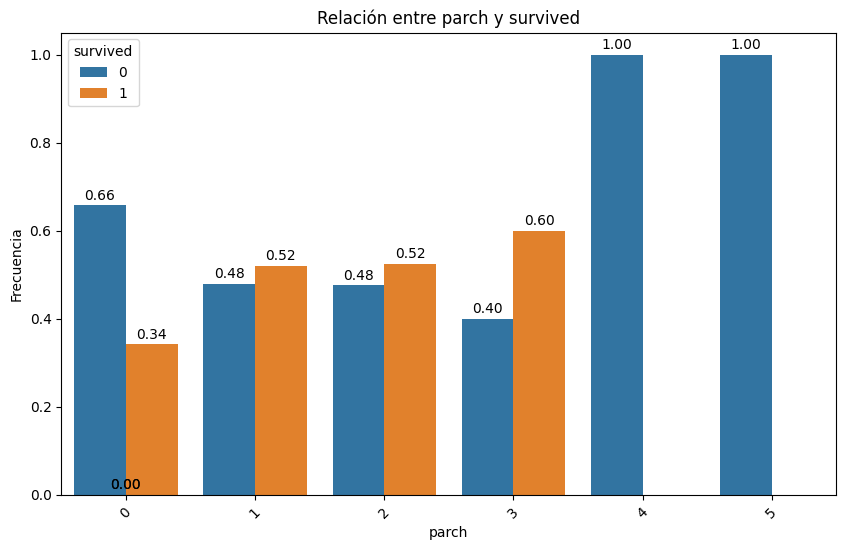

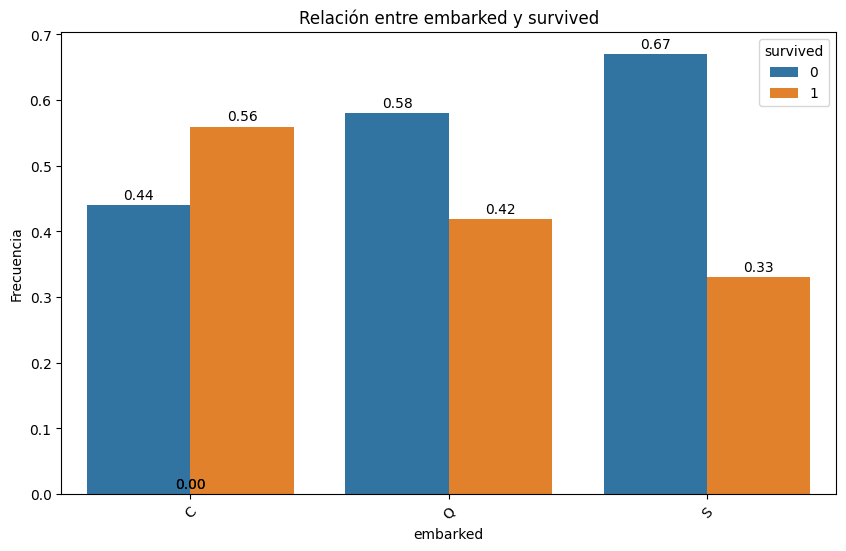

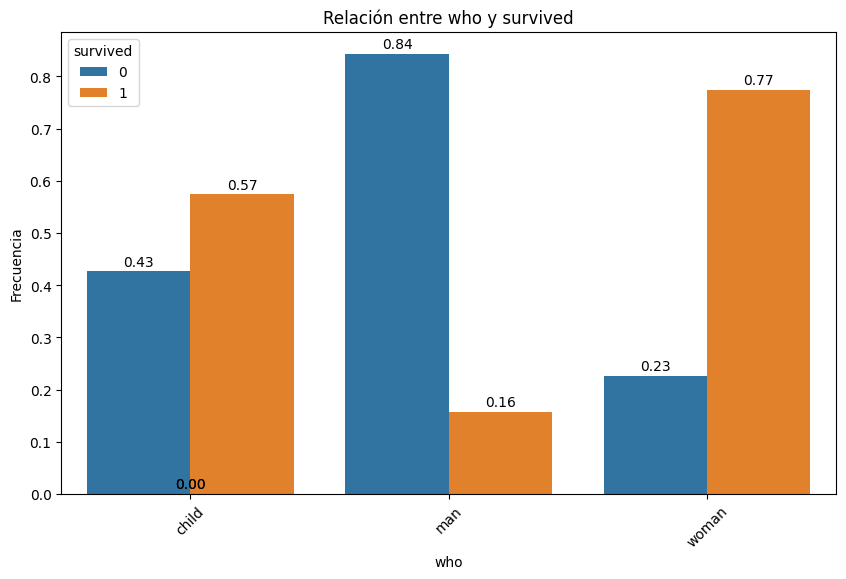

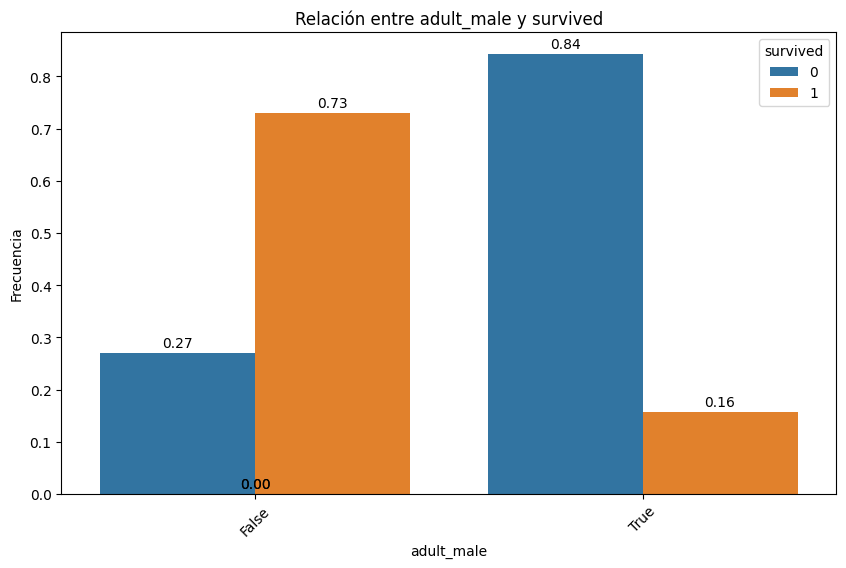

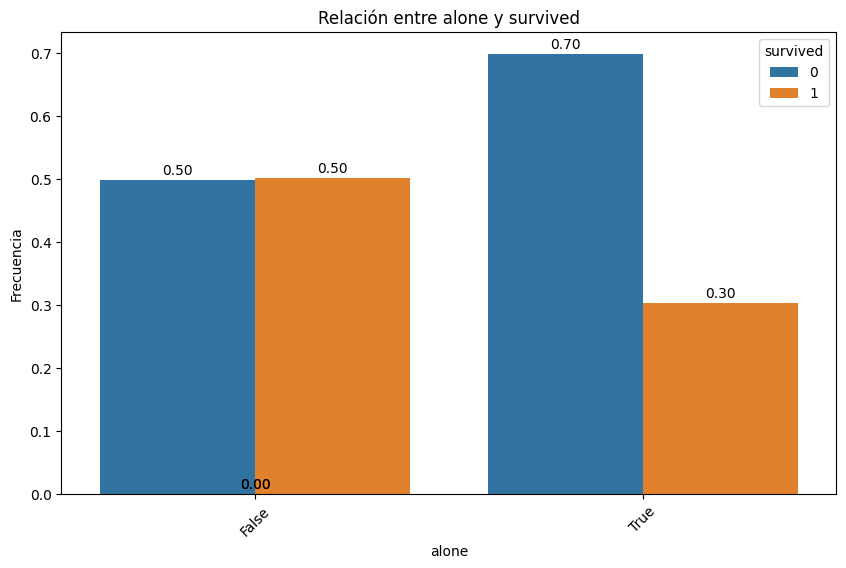

In [82]:
for columna_categoria in columnas_categoricas:
    viz.plot_categorical_relationship_fin(train_set, cat_col1=columna_categoria, cat_col2=target, relative_freq=True, show_values=True, size_group=7)

Todas las variables categóricas influyen en las distribuciones del *target*. Nos las quedamos todas como *features* categóricas

In [83]:
features_cat = columnas_categoricas
features_cat

['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'adult_male', 'alone']

In [84]:
columnas_numericas = ["age", "fare"]

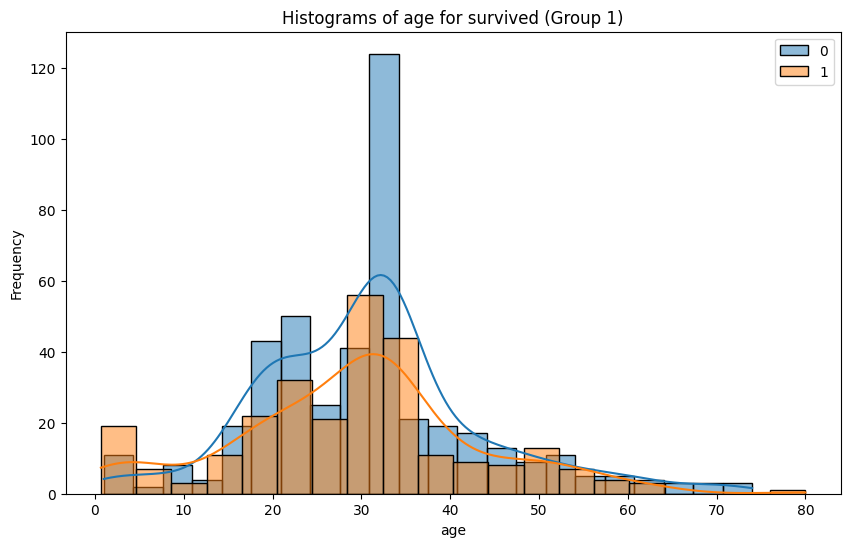

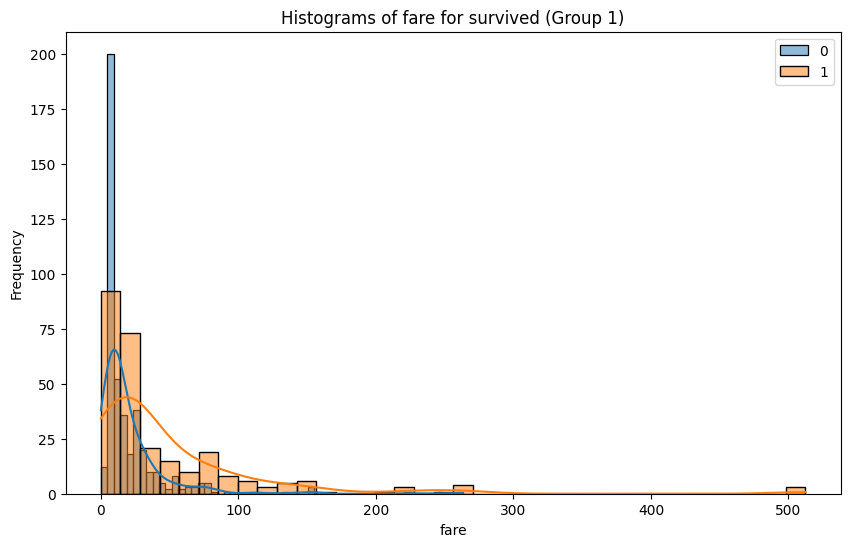

In [85]:
for columna_numerica in columnas_numericas:
    viz.plot_grouped_histograms(train_set, cat_col=target, num_col=columna_numerica, group_size=2)

In [86]:
features_num = columnas_numericas
features_num

['age', 'fare']

# 4. Tratamiento de *features*

Aplicamos las transformaciones al DataFrame de train

In [87]:
#Creamos una copia del DataFrame de train
train_set_transformado = train_set.copy()

#Aplicamos las transformaciones
train_set_transformado["sex"] = train_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
train_set_transformado["adult_male"] = train_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
train_set_transformado["alone"] = train_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

train_set_transformado = pd.get_dummies(train_set_transformado, columns=["embarked","who"], dtype=int)

train_set_transformado.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
46,0,3,1,32.965875,1,0,15.500,1,0,0,1,0,0,1,0
230,1,1,0,35.000000,1,0,83.475,0,0,0,0,1,0,0,1
657,0,3,0,32.000000,1,1,15.500,0,0,0,1,0,0,0,1
888,0,3,0,31.625714,1,2,23.450,0,0,0,0,1,0,0,1
809,1,1,0,33.000000,1,0,53.100,0,0,0,0,1,0,0,1


Aplicamos las mismas transformaciones al DataFrame de test

In [88]:
#Creamos una copia del DataFrame de test
test_set_transformado = test_set.copy()

#Aplicamos las transformaciones
test_set_transformado["sex"] = test_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
test_set_transformado["adult_male"] = test_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
test_set_transformado["alone"] = test_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

test_set_transformado = pd.get_dummies(test_set_transformado, columns=["embarked","who"], dtype=int)

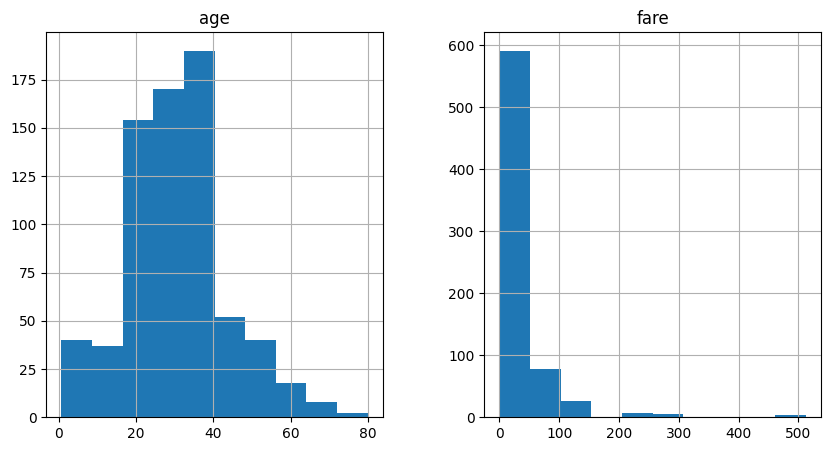

In [89]:
train_set_transformado[features_num].hist(figsize=(10,5));

In [90]:
columnas_log = ["fare"]

for columna in columnas_log:
    train_set_transformado[columna] = train_set_transformado[columna].apply(np.log1p)
    test_set_transformado[columna] = test_set_transformado[columna].apply(np.log1p)

,count,mean,std,min,25%,50%,75%,max
age,711.0,30.263142,13.095061,0.67,22.000000,31.625714,35.000000,80.000000
fare,711.0,2.934461,0.965599,0.00,2.185579,2.708050,3.443128,6.240917


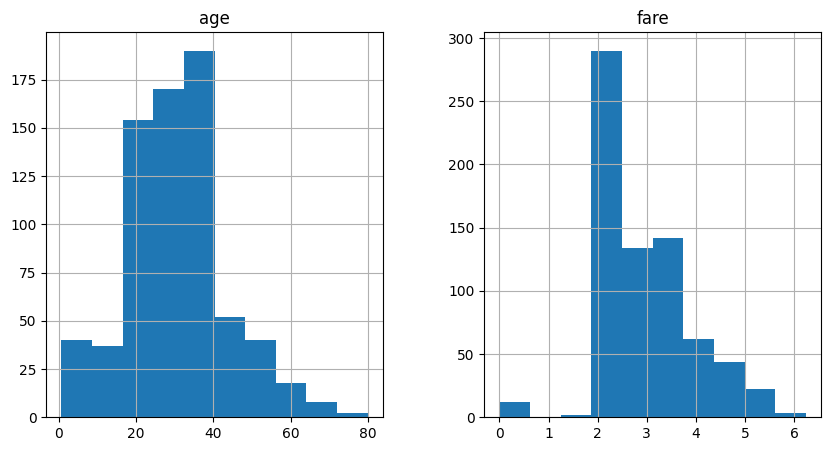

In [91]:
train_set_transformado[features_num].hist(figsize=(10,5));
train_set_transformado[features_num].describe().T

In [92]:
scaler = MinMaxScaler()

features_minmax = features_num + ["pclass"] + ["sibsp"] + ["parch"]

scaler.fit(train_set_transformado[features_minmax]) #Hacemos el fit solo con los datos de train

train_set_transformado[features_minmax] = scaler.transform(train_set_transformado[features_minmax])
test_set_transformado[features_minmax] = scaler.transform(test_set_transformado[features_minmax])

# 5. Selección del modelo

In [96]:
X_train = train_set_transformado.drop(columns=[target])
y_train = train_set_transformado[target]

X_test = test_set_transformado.drop(columns=[target])
y_test = test_set_transformado[target]

In [97]:
rf_clf = RandomForestClassifier(random_state= 42)
mlp_clf = MLPClassifier()

**Optimización Random Forest**

In [98]:
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight' : ["balanced", None]
}

rf_grid = GridSearchCV(rf_clf, param_grid= rf_grid, cv = 5, scoring = "balanced_accuracy")

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [99]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

**Optimización MLP**

In [100]:
mlp_grid = {
    'hidden_layer_sizes': [(100), (100,100,100)],
    'activation': ["relu", "tanh"],
    'solver': ["adam", "sgd"],
    'alpha': [0.0001, 0.001],
    'learning_rate' : ["constant", "adaptive"]
}

mlp_grid = GridSearchCV(mlp_clf, param_grid=mlp_grid, cv = 5, scoring = "balanced_accuracy")

mlp_grid.fit(X_train, y_train)

c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [100, (100, 100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='balanced_accuracy')

In [103]:
mlp_grid.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'solver': 'adam'}

Comparamos los modelos con los mejores hiperparámetros encontrados 

In [104]:
rf_opt = RandomForestClassifier(class_weight = "balanced",
                                max_depth = 10,
                                min_samples_leaf = 1,
                                min_samples_split = 5,
                                n_estimators = 100,
                                random_state = 42)

#Registramos el tiempo de entrenamiento
start = time.time()
rf_opt.fit(X_train, y_train)
end = time.time()
train_time = end-start

#Registramos el tiempo de prediccion
start = time.time()
y_pred = rf_opt.predict(X_test)
end = time.time()
pred_time = end-start

#Mostramos los datos en un DataFrame
rf_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall medio': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['RandomForest']
                            )

In [105]:
mlp_opt = MLPClassifier(activation = "tanh",
                        alpha = 0.001,
                        hidden_layer_sizes = (100),
                        learning_rate = "constant",
                        solver = "adam")

#Registramos el tiempo de entrenamiento
start = time.time()
mlp_opt.fit(X_train, y_train)
end = time.time()
train_time = end-start

#Registramos el tiempo de prediccion
start = time.time()
y_pred = mlp_opt.predict(X_test)
end = time.time()
pred_time = end-start

#Mostramos los datos en un DataFrame
mlp_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall medio': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['MLP']
                            )

c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
metrics = pd.concat([rf_metrics, mlp_metrics])
metrics.head()

,accuracy,precision,recall medio,train_time,pred_time
RandomForest,0.803371,0.798446,0.780947,0.113121,0.001033
MLP,0.786517,0.776310,0.769844,0.670570,0.007724


Obtenemos resultados similares en cuanto a las métricas de ambos modelos (aunque con diferencias), sin embargo nos quedaríamos con el modelo RandomForest ya que tiene mejores métricas y además el tiempo de entrenamiento es menor

# 6. Análisis de errores del modelo MLP

Mostramos la matriz de confusión y el *classification report* para el modelo mejor modelo MLP obtenido mediante GridSearch

Matriz de confusión test:


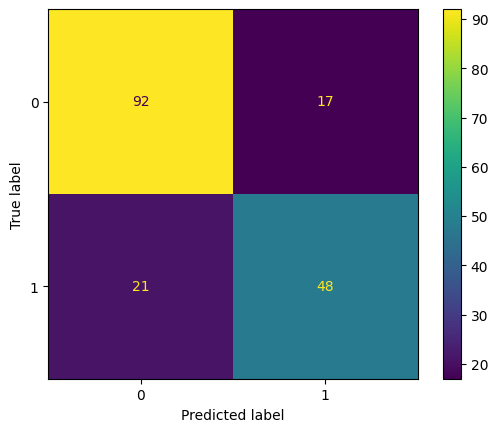

In [107]:
y_pred_test = mlp_opt.predict(X_test)

print("Matriz de confusión test:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [108]:
print(classification_report(y_test, y_pred_test))

Classification report test:

               precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.74      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178



Uso el vizcamp tool en todo esto porque es mas util que haceme mis funciones.